<a href="https://colab.research.google.com/github/pVj15/Student-Performance-Prediction/blob/main/Student_Performanace_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install pandas numpy scikit-learn matplotlib seaborn


In [2]:
import pandas as pd

data = {
    'study_hours': [5, 1, 4, 3, 2],
    'attendance': [90, 60, 85, 75, 50],
    'prev_exam_score': [78, 45, 72, 65, 40],
    'participation': [4, 1, 3, 2, 1],
    'sleep_hours': [7, 5, 6, 6, 4],
    'internet_usage': [2, 6, 3, 5, 7],
    'result': ['Pass', 'Fail', 'Pass', 'Pass', 'Fail']
}

df = pd.DataFrame(data)
print(df)


   study_hours  attendance  prev_exam_score  participation  sleep_hours  \
0            5          90               78              4            7   
1            1          60               45              1            5   
2            4          85               72              3            6   
3            3          75               65              2            6   
4            2          50               40              1            4   

   internet_usage result  
0               2   Pass  
1               6   Fail  
2               3   Pass  
3               5   Pass  
4               7   Fail  


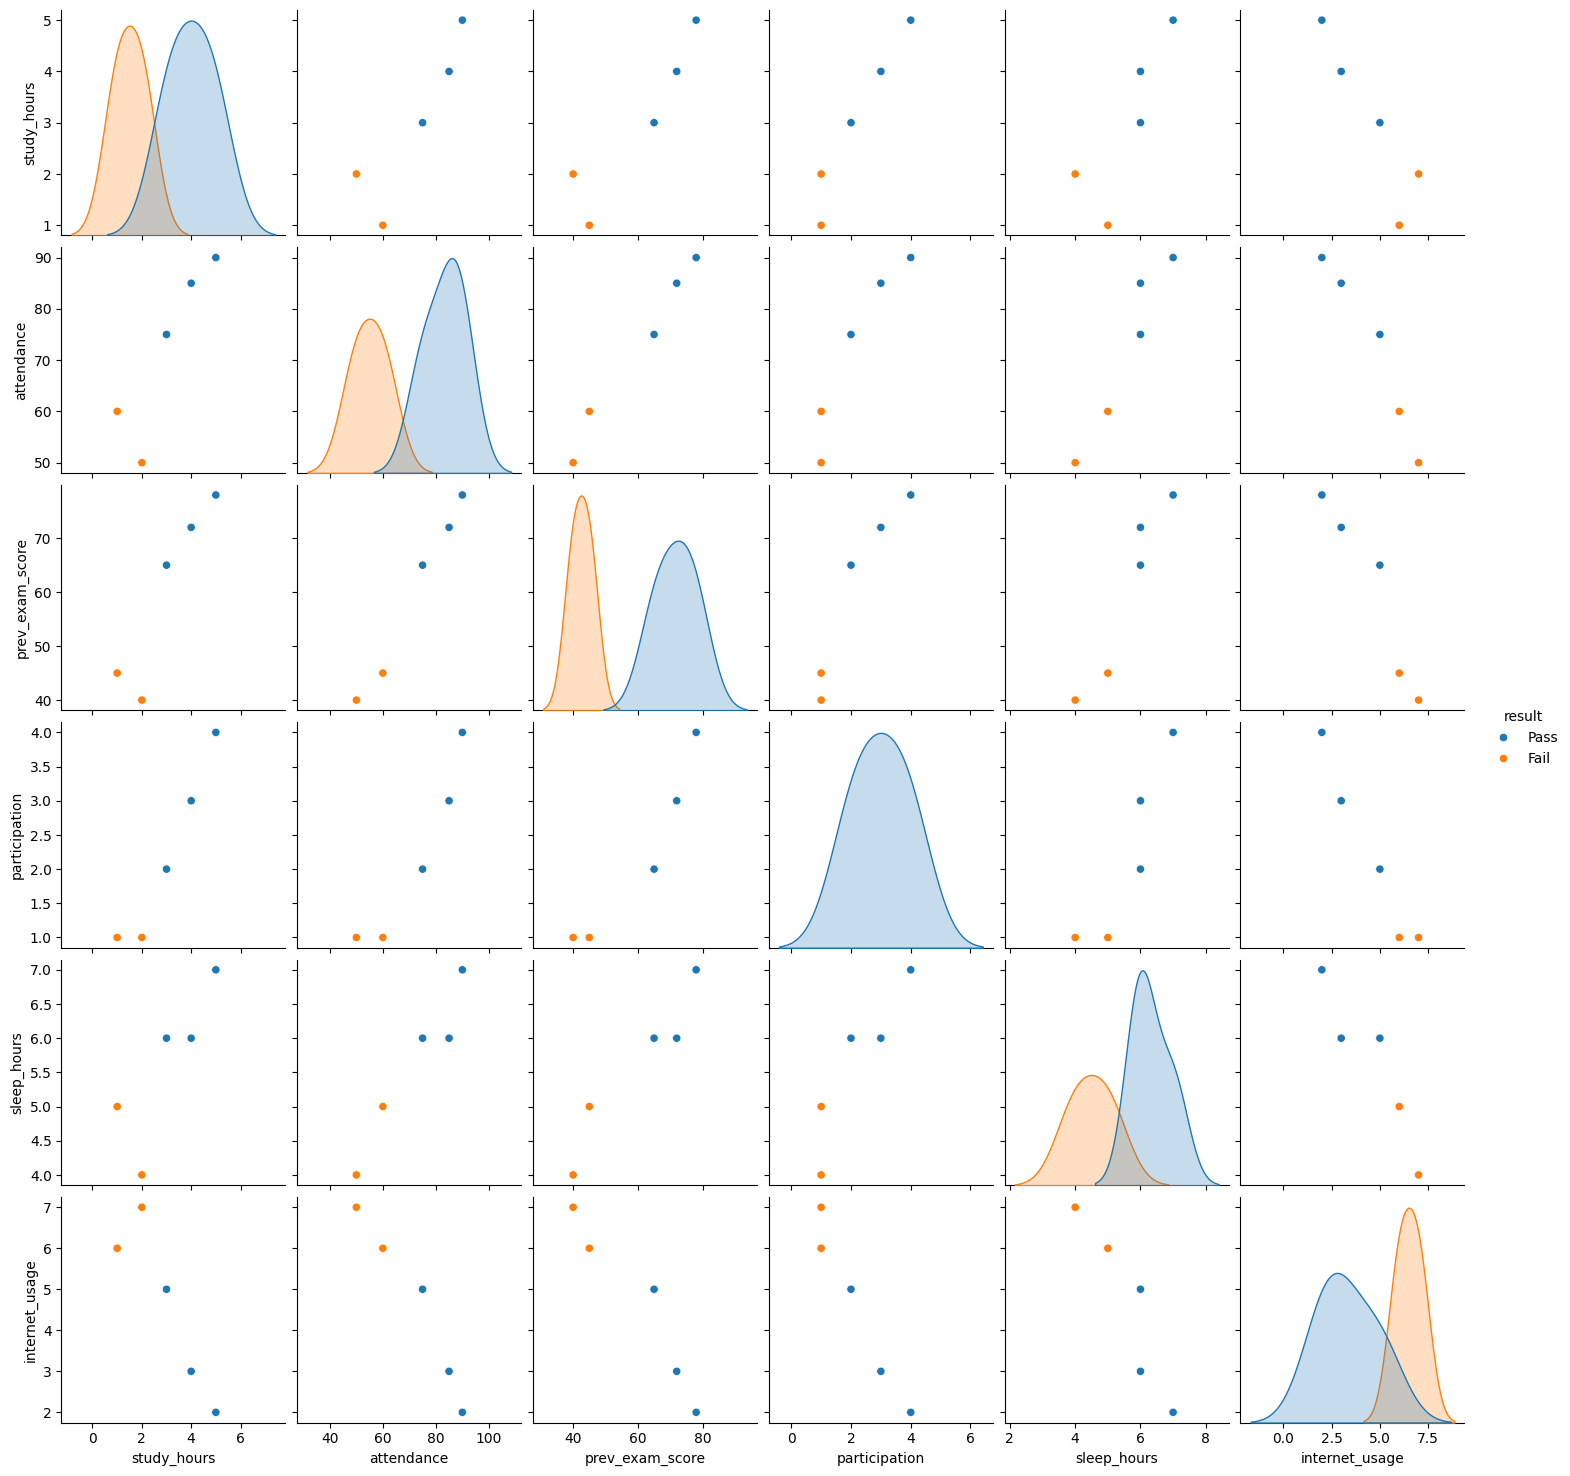

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df, hue="result")
plt.show()


In [4]:
df['result'] = df['result'].map({'Pass': 1, 'Fail': 0})


In [5]:
X = df.drop('result', axis=1)
y = df['result']


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Split the data: 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = RandomForestClassifier()
model.fit(X_train, y_train)


RandomForestClassifier()

In [7]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)


Accuracy: 1.0


In [9]:
# Create new input with column names
new_student = pd.DataFrame([{
    'study_hours': 4,
    'attendance': 85,
    'prev_exam_score': 70,
    'participation': 3,
    'sleep_hours': 7,
    'internet_usage': 2
}])

# Now predict
prediction = model.predict(new_student)
print("Prediction:", "Pass 🎉" if prediction[0] == 1 else "Fail ❌")


Prediction: Pass 🎉


In [10]:
!pip install gradio



In [11]:
def predict_result(study_hours, attendance, prev_exam_score, participation, sleep_hours, internet_usage):
    input_data = pd.DataFrame([{
        'study_hours': study_hours,
        'attendance': attendance,
        'prev_exam_score': prev_exam_score,
        'participation': participation,
        'sleep_hours': sleep_hours,
        'internet_usage': internet_usage
    }])
    prediction = model.predict(input_data)[0]
    return "Pass 🎉" if prediction == 1 else "Fail ❌"


In [12]:
import gradio as gr

# Create the UI
interface = gr.Interface(
    fn=predict_result,
    inputs=[
        gr.Slider(0, 10, step=1, label="Study Hours"),
        gr.Slider(0, 100, step=1, label="Attendance (%)"),
        gr.Slider(0, 100, step=1, label="Previous Exam Score"),
        gr.Slider(0, 5, step=1, label="Participation (0–5)"),
        gr.Slider(0, 10, step=1, label="Sleep Hours"),
        gr.Slider(0, 10, step=1, label="Internet Usage (Hours/day)"),
    ],
    outputs="text",
    title="🎓 Student Performance Predictor",
    description="Enter student details to predict if they'll Pass or Fail."
)

interface.launch()


It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://b0a1edf8336a3d5941.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
